In [1]:
import elo

In [2]:
test = elo.ELO(player_list=['Ryan','Sean','Michael'])

In [3]:
test.EM.show_cache()

{'Michael': 1600, 'Sean': 1600, 'Ryan': 1600}


In [4]:
test.do_competition(winner='Ryan',loser='Sean')
test.EM.show_cache()

{'Michael': 1600, 'Sean': 1584.0, 'Ryan': 1616.0}


In [5]:
test.do_competition(winner='Ryan',loser='Sean')
test.EM.show_cache()

{'Michael': 1600, 'Sean': 1569.4695015289756, 'Ryan': 1630.5304984710244}


In [6]:
test.season_reset()
test.EM.show_cache()

{'Michael': 1600.0, 'Sean': 1584.7347507644877, 'Ryan': 1615.2652492355123}


# CFB Sample Data Testing
___

In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook

import elo

cfb_df = pd.read_csv('cfb_sample_data.csv').dropna(subset=['Winning','Losing'])

In [61]:
write = False
model_log = []
for rf in np.linspace(2.5,4.5,21):#[3.25]:
    for K in np.linspace(25,35,21):#[10,15,20,25,30,35,40,45,50,55,60]:
        for sdf in [.925]:#np.linspace(.65,1.5,20):
            wrong = 0
            cut = cfb_df[['Year','Winning','Winning Points','Losing','Losing Points']].copy()
            if write:
                cut['Winning W Prob'] = .5
                cut['Losing W Prob'] = .5

            cfb = elo.ELO(K=K, reset_factor=rf, score_div_factor=sdf)
            for game in range(len(cut)):
                try:
                    if cut['Year'][game]> cut['Year'][game-1]:
                        cfb.season_reset()
                except:
                    pass
                w_prob, l_prob = cfb.do_competition(winner=cut['Winning'][game],
                                                    loser=cut['Losing'][game], 
                                                    scoring={'win_score':cut['Winning Points'][game],
                                                             'lose_score':cut['Losing Points'][game]})
                if w_prob < l_prob:
                    if cut['Year'][game] not in [2011,2012]:
                        wrong += 1
                if write:
                    cut.loc[game,'Winning W Prob'], cut.loc[game,'Losing W Prob'] = w_prob, l_prob
                    wrong = len(cut[(cut['Winning W Prob'] < cut['Losing W Prob']) & ~(cut['Year'].isin([2011,2012]))])
            model_log.append({'rf':rf,'K':K,'sdf':sdf,'wrongs':wrong})

In [62]:
ms = pd.DataFrame(model_log)
ms.head()
del ms['sdf']
ms_ = ms.groupby(['K','rf']).first().unstack(level=1)['wrongs']
ms_

rf,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.3,3.4,...,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5
K,,,,,,,,,,,,,,,,,,,,,
25.0,1138,1131,1136,1131,1128,1130,1125,1125,1122,1124,...,1124,1126,1126,1124,1124,1129,1129,1130,1128,1126
25.5,1139,1133,1129,1132,1126,1124,1126,1122,1120,1123,...,1123,1123,1122,1122,1120,1124,1124,1127,1126,1126
26.0,1138,1137,1131,1130,1126,1121,1121,1120,1115,1117,...,1120,1121,1122,1122,1122,1119,1121,1123,1125,1126
26.5,1137,1136,1133,1130,1124,1121,1120,1115,1116,1113,...,1120,1116,1116,1120,1121,1117,1120,1121,1122,1124
27.0,1136,1136,1130,1126,1126,1121,1117,1116,1114,1108,...,1113,1116,1113,1116,1116,1116,1117,1118,1117,1120
27.5,1139,1133,1133,1133,1126,1120,1118,1117,1112,1110,...,1110,1111,1113,1115,1115,1117,1114,1116,1115,1115
28.0,1139,1136,1136,1132,1123,1120,1118,1119,1114,1109,...,1113,1113,1112,1114,1112,1116,1115,1115,1113,1114
28.5,1138,1137,1134,1133,1130,1123,1121,1118,1117,1112,...,1112,1108,1115,1109,1113,1113,1115,1117,1114,1116
29.0,1136,1135,1131,1133,1130,1126,1121,1117,1119,1111,...,1108,1108,1111,1114,1111,1110,1112,1114,1117,1117


<IPython.core.display.Javascript object>


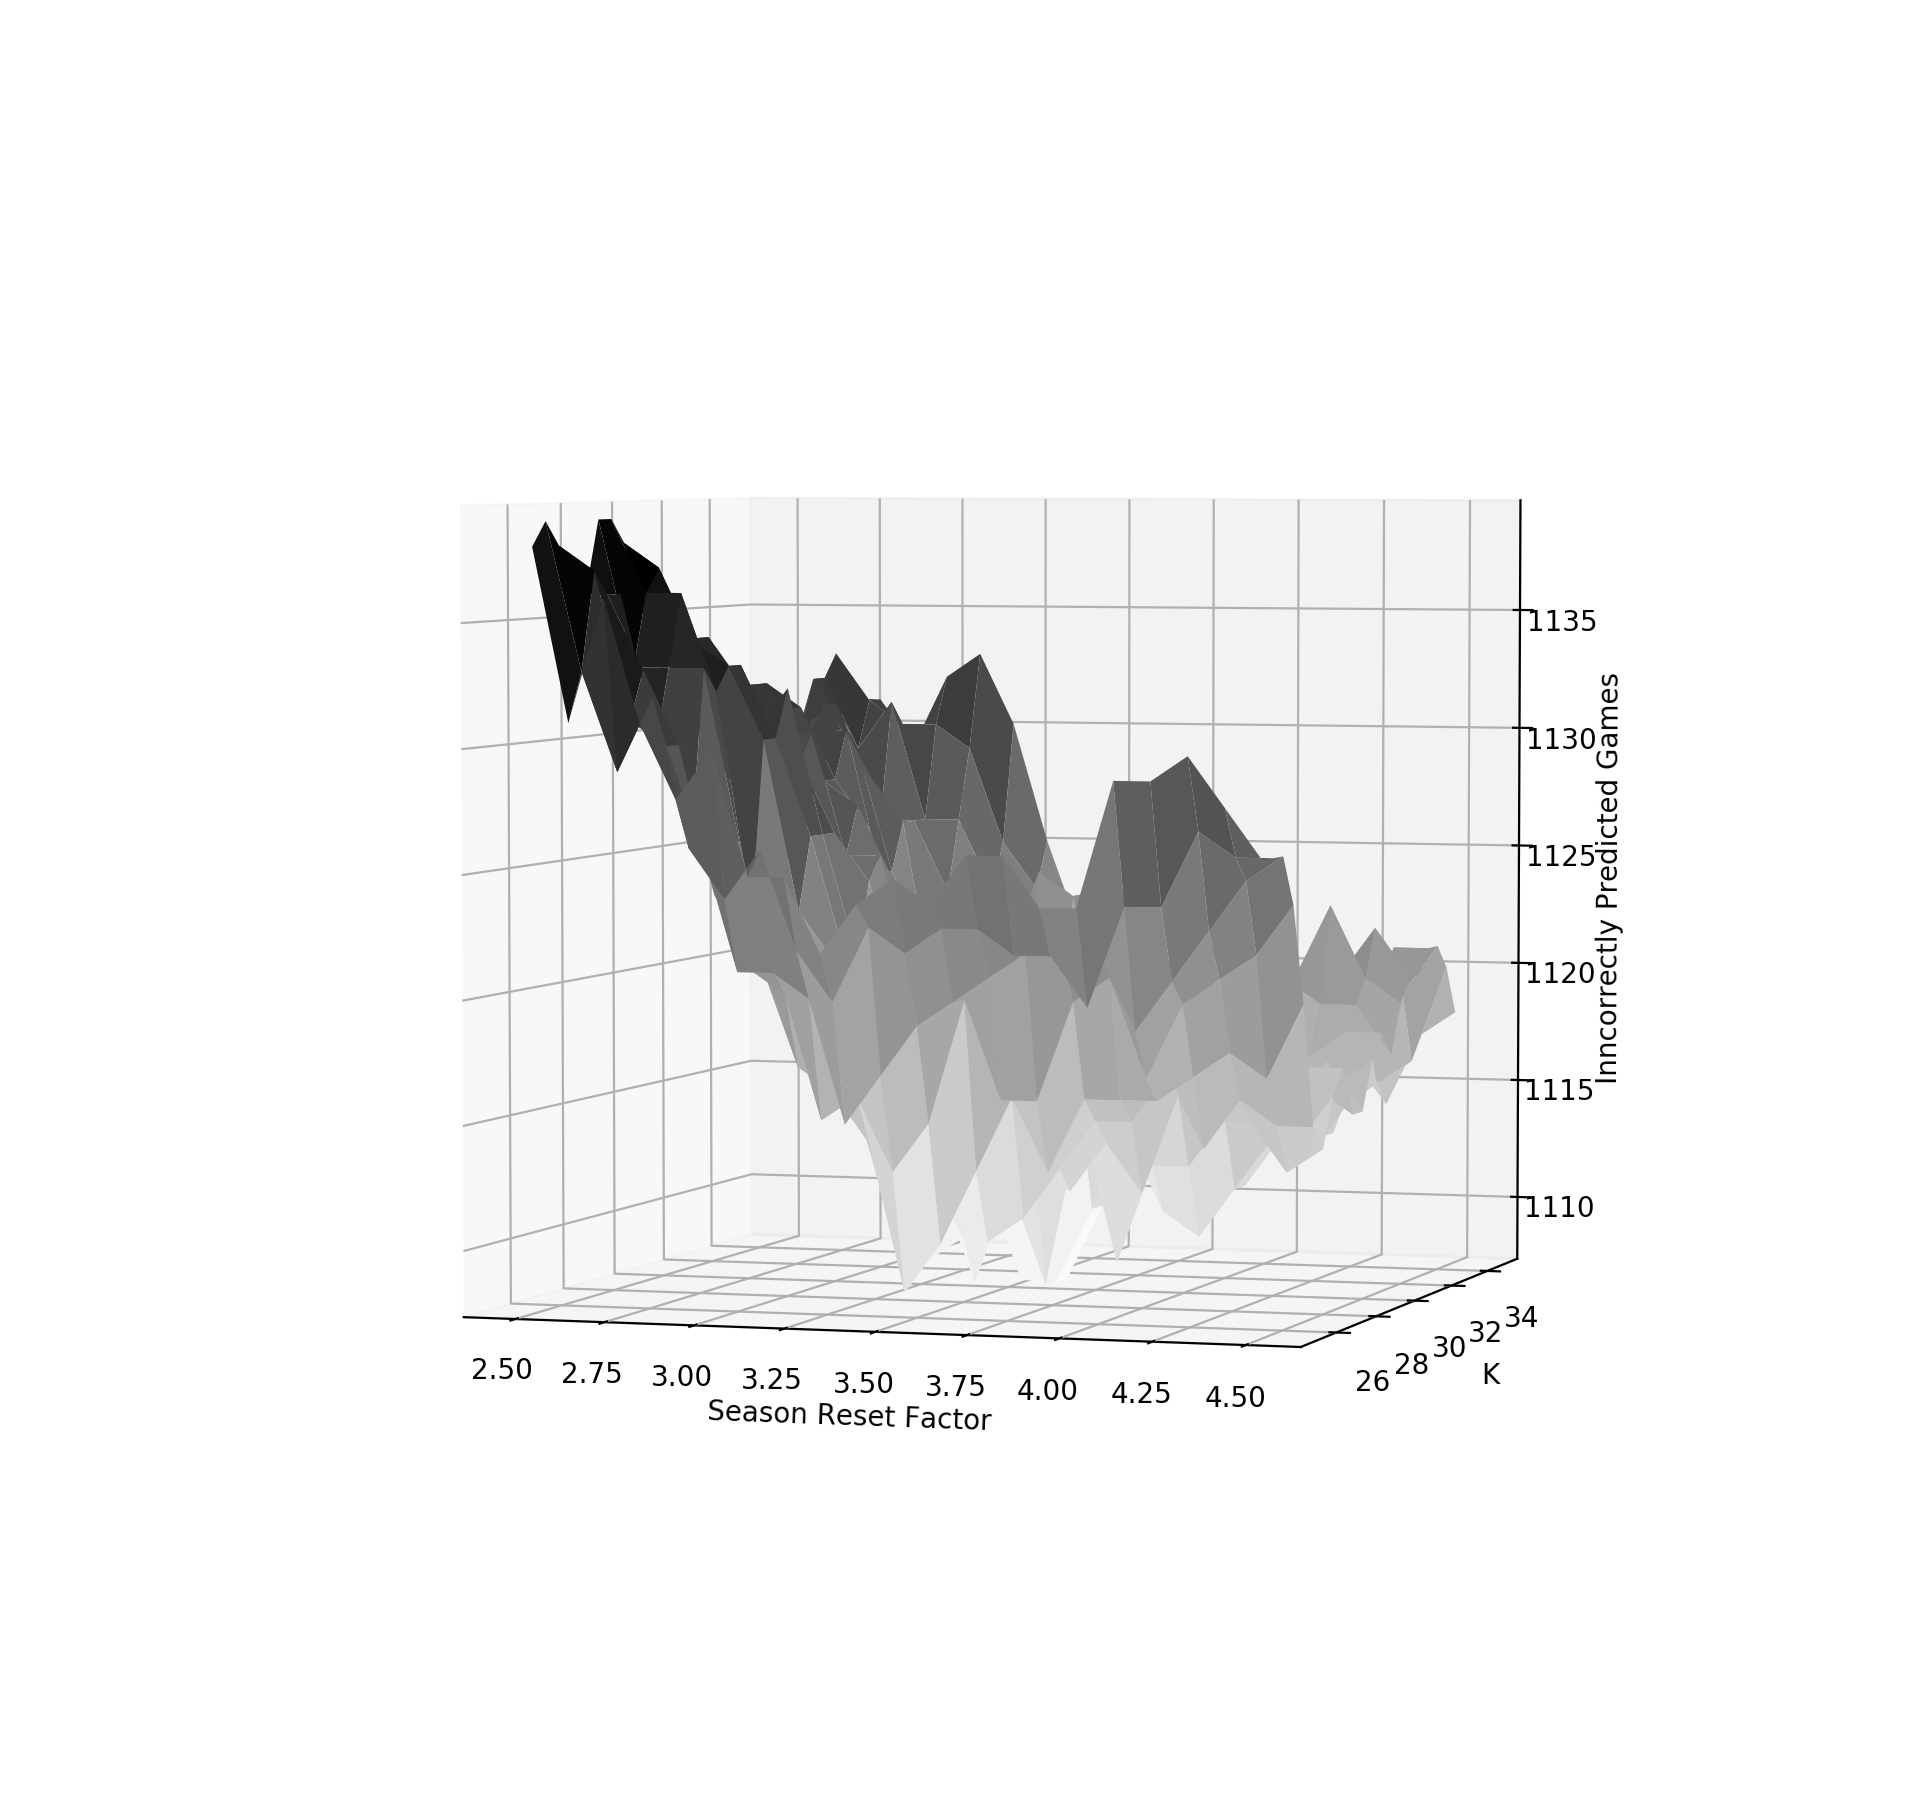

Text(0.5,0,'Inncorrectly Predicted Games')

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = ms_.columns.tolist()
y = ms_.index.tolist()
X, Y = np.meshgrid(x, y)
z = ms_

# Plot the surface
ax.plot_surface(X, Y, z,cmap='binary', )
ax.set_xlabel('Season Reset Factor')
ax.set_ylabel('K')
ax.set_zlabel('Inncorrectly Predicted Games')

# Running on CFB DataFrame

In [5]:
cfb_df = pd.read_csv('cfb_long_sample_data.csv').dropna(subset=['Winning','Losing'])
cut = cfb_df[['Year','Winning','Winning Points','Losing','Losing Points']].copy()
cut['Winning W Prob'] = .5
cut['Losing W Prob'] = .5

cfb = elo.ELO(K=30, reset_factor=3.75, score_div_factor=.975)
for game in range(len(cut)):
    try:
        if cut['Year'][game]> cut['Year'][game-1]:
            cfb.season_reset()
    except:
        pass
    w_prob, l_prob = cfb.do_competition(winner=cut['Winning'][game],
                                        loser=cut['Losing'][game], 
                                        scoring={'win_score':cut['Winning Points'][game],
                                                 'lose_score':cut['Losing Points'][game]})
    cut.loc[game,'Winning W Prob'], cut.loc[game,'Losing W Prob'] = w_prob, l_prob

In [10]:
#UPSETS
up = cut[(cut['Winning W Prob'] <= cut['Losing W Prob'])]

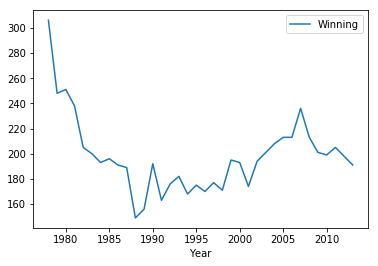

In [13]:
up.groupby('Year').count()[['Winning']].plot()

In [15]:
(float(len(cut))-float(len(up)))/float(len(cut))

0.7157550629883591

In [18]:
# Problems with DB
cut[cut['Winning Points'] <= cut['Losing Points']]

,Year,Winning,Winning Points,Losing,Losing Points,Winning W Prob,Losing W Prob
207,2011,W. Michigan,31.0,Connecticut,31.0,0.490144,0.509856
1280,2012,Ohio State,21.0,Wisconsin,21.0,0.527617,0.472383
1900,2013,UCF,19.0,Houston,19.0,0.558119,0.441881
2059,2013,La.-Monroe,31.0,La.-Lafayette,38.0,0.270306,0.729694
2884,2015,Washington State,37.0,Rutgers,37.0,0.414118,0.585882
3048,2015,C. Michigan,29.0,N. Illinois,30.0,0.395332,0.604668
3364,2015,Arizona,30.0,Utah,30.0,0.314112,0.685888
3564,2015,Auburn,31.0,Memphis,37.0,0.425992,0.574008
3981,2016,Charlotte,27.0,Marshall,27.0,0.414510,0.585490
4124,2016,Oklahoma State,45.0,Texas Tech,52.0,0.696429,0.303571
